In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from collections import defaultdict
import plotly.express as px
dates = ["30-09-21", "08-12-21", "31-12-21", "31-03-22", "30-06-22", "30-09-22"]
file_name_syntax = ["IEX_Public Shareholding_", " - Sheet1.csv"]
# Entities of Interest
eois = ["Alternate Investment Funds", 
       "PARAG PARIKH FLEXI CAP FUND", "MIRAE ASSET TAX SAVER FUND", 'Mutual Funds', 
       "Foreign Portfolio Investors", "LIFE INSURANCE CORPORATION OF INDIA", "SMALLCAP WORLD FUND, INC", 
       "WF ASIAN RECONNAISSANCE FUND LIMITED", "AQUAMARINE MASTER FUND L.P", 
       "ICICI PRUDENTIAL LIFE INSURANCE COMPANY LIMITED",
      "Individuals -"]
# eois = []
eoi_to_exclude = ['Sub-Total (B)(1)', 'Sub-Total (B)(3)', 'other', 'others']
entity_normalized_entity_per_map ={'Mutual Funds/' : 'Mutual Funds',
                                  'Resident Individuals holding nominal share capital up to Rs. 2 lakhs': 'Individuals -',
                                  'Foreign Portfolio Investors Category I': 'Foreign Portfolio Investors',
                                  'MIRAE ASSET LARGE CAP FUND': "MIRAE ASSET TAX SAVER FUND"}
date_entity_shareholding_per_map = defaultdict(dict)
# assuming that only one of Mutual Funds/ and Mutual Funds will be present in one csv
def normalise_entity(entity):
    return entity_normalized_entity_per_map.get(entity, entity)

In [2]:
for date in dates:
    file_name = date.join(file_name_syntax)
    df_for_eoi = pd.read_csv(file_name,index_col=0, header=0)
    entities = df_for_eoi.loc[:, "CATEGORY OF SHAREHOLDER"]
    df = pd.read_csv(file_name,index_col=1, header=0)
    # break
    for entity in entities:
        try:
            sharholding_percent = float("".join(df.loc[:,'TOTAL NOS. SHARES HELD'].get(entity, "0").split(",")))
            date_entity_shareholding_per_map[date][normalise_entity(entity)] = sharholding_percent
        except Exception as e:
            print(f"Failed for entity:{entity} and date:{date}", e, df.loc[:,'TOTAL NOS. SHARES HELD'].get(entity, "0"))
            continue
        # if float(sharholding_percent) > 0 and normalise_entity(entity) not in eois and normalise_entity(entity) not in eoi_to_exclude:
        #     eois.append(normalise_entity(entity))


Failed for entity:(II) and date:30-09-21 could not convert string to float: '(VII) = (IV)+(V)+ (VI)' (VII) = (IV)+(V)+ (VI)
Failed for entity:Institutions and date:30-09-21 could not convert string to float: '-' -
Failed for entity:Venture Capital Funds and date:30-09-21 could not convert string to float: '-' -
Failed for entity:Foreign Venture Capital Investors and date:30-09-21 could not convert string to float: '-' -
Failed for entity:Insurance Companies and date:30-09-21 could not convert string to float: '-' -
Failed for entity:Provident Funds/ Pension Funds and date:30-09-21 could not convert string to float: '-' -
Failed for entity:Any Other (specify) and date:30-09-21 'Series' object has no attribute 'split' CATEGORY OF SHAREHOLDER
Any Other (specify)    1,77,29,532
Any Other (specify)    5,81,66,293
Name: TOTAL NOS. SHARES HELD, dtype: object
Failed for entity:Other and date:30-09-21 'Series' object has no attribute 'split' CATEGORY OF SHAREHOLDER
Other            329
Other   

['Alternate Investment Funds', 'PARAG PARIKH FLEXI CAP FUND', 'MIRAE ASSET TAX SAVER FUND', 'Mutual Funds', 'Foreign Portfolio Investors', 'LIFE INSURANCE CORPORATION OF INDIA', 'SMALLCAP WORLD FUND, INC', 'WF ASIAN RECONNAISSANCE FUND LIMITED', 'AQUAMARINE MASTER FUND L.P', 'ICICI PRUDENTIAL LIFE INSURANCE COMPANY LIMITED', 'Individuals -']
['30-09-21', '08-12-21', '31-12-21', '31-03-22', '30-06-22', '30-09-22']


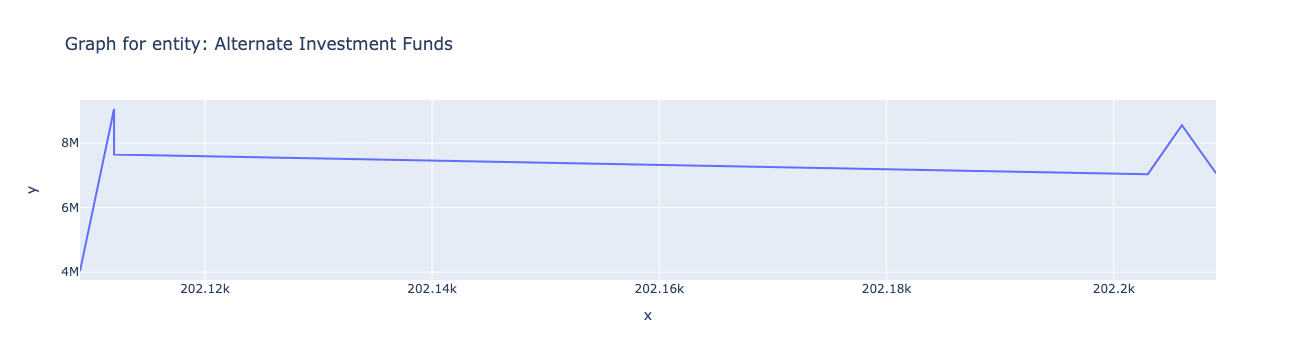

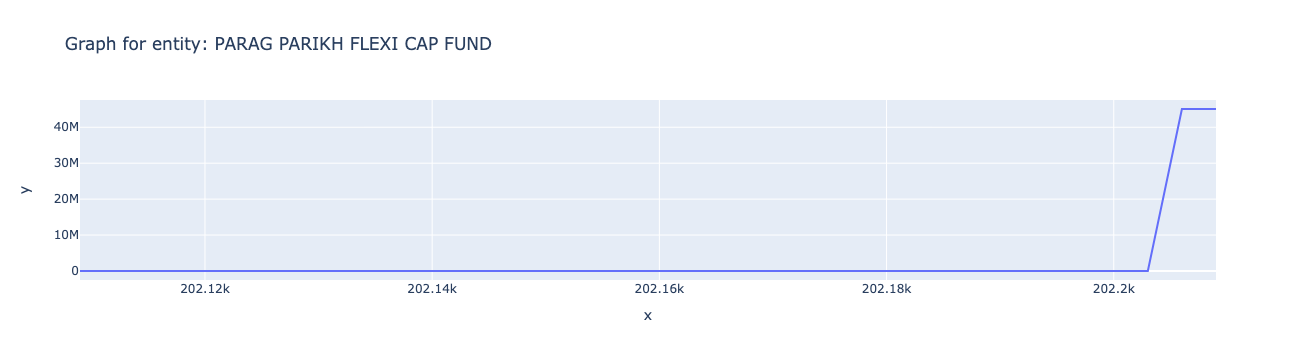

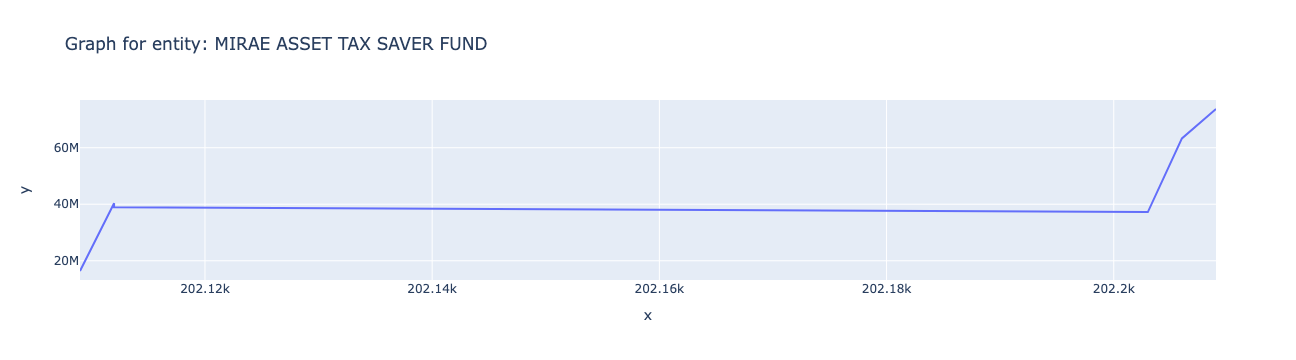

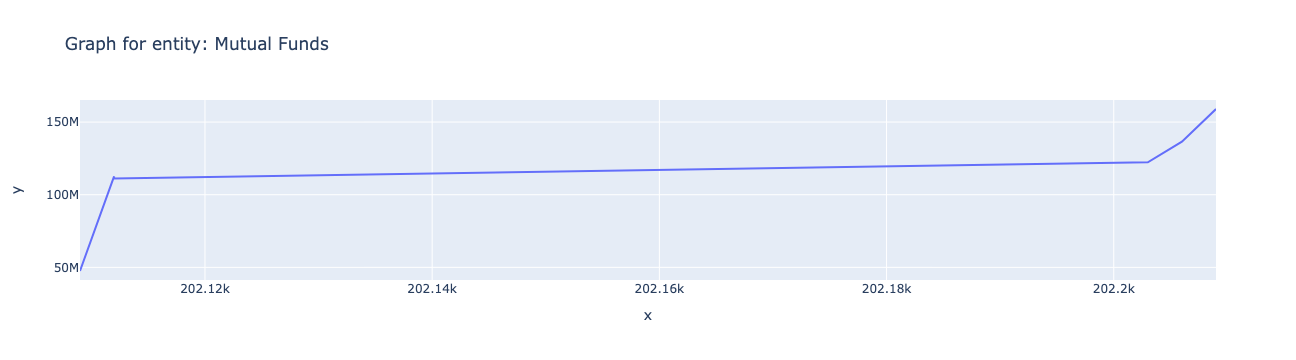

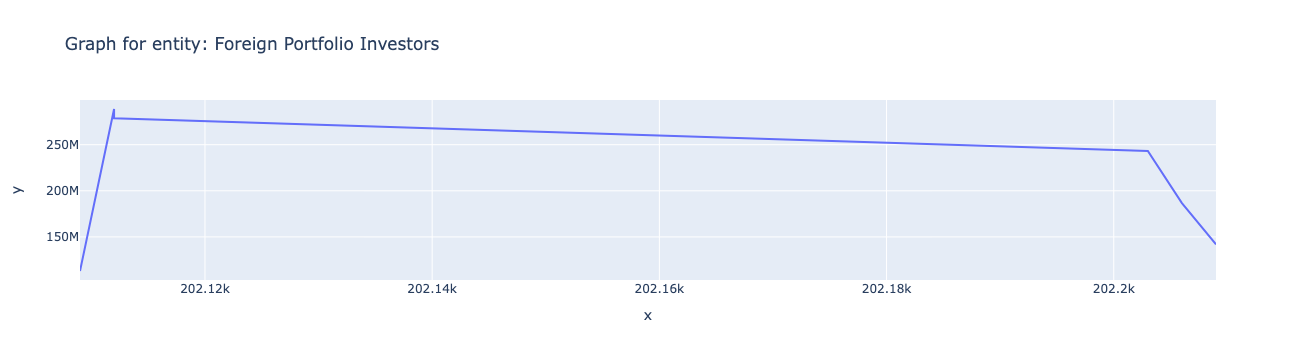

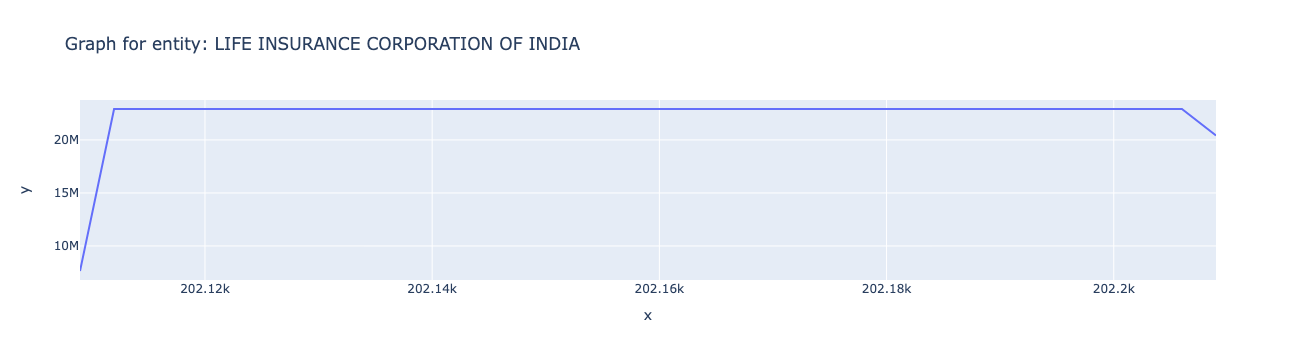

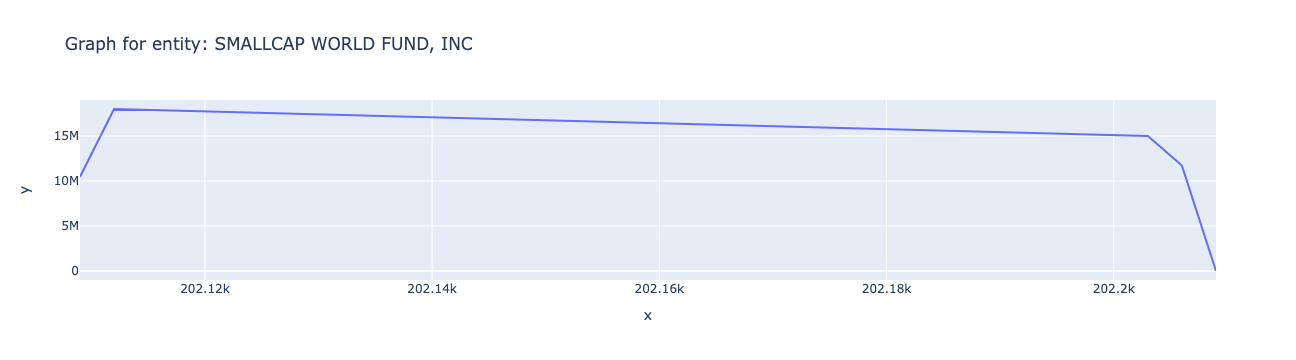

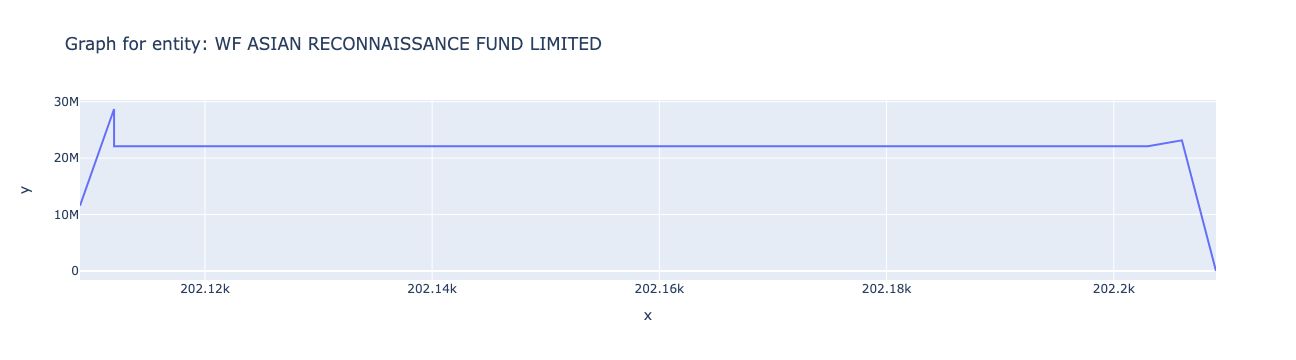

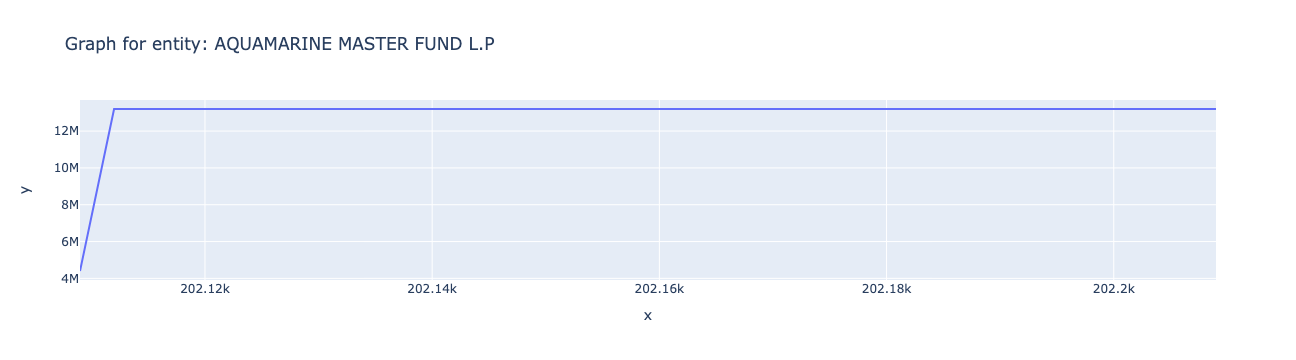

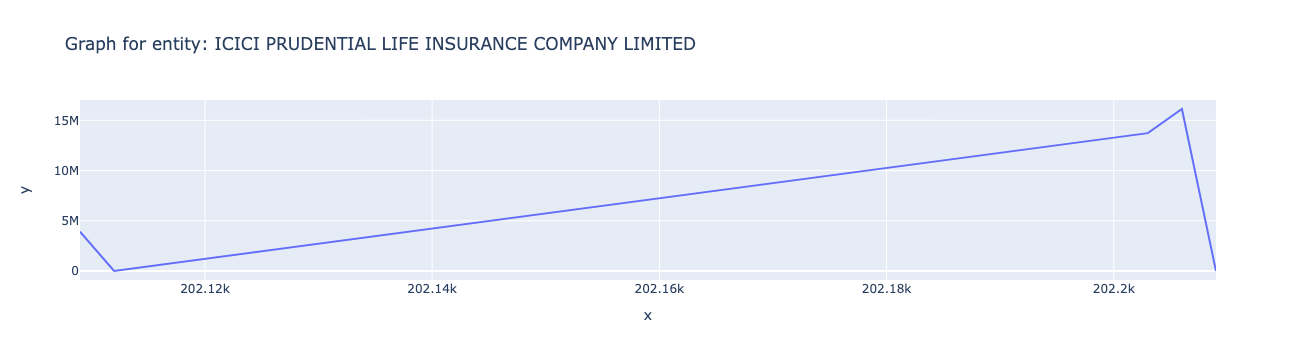

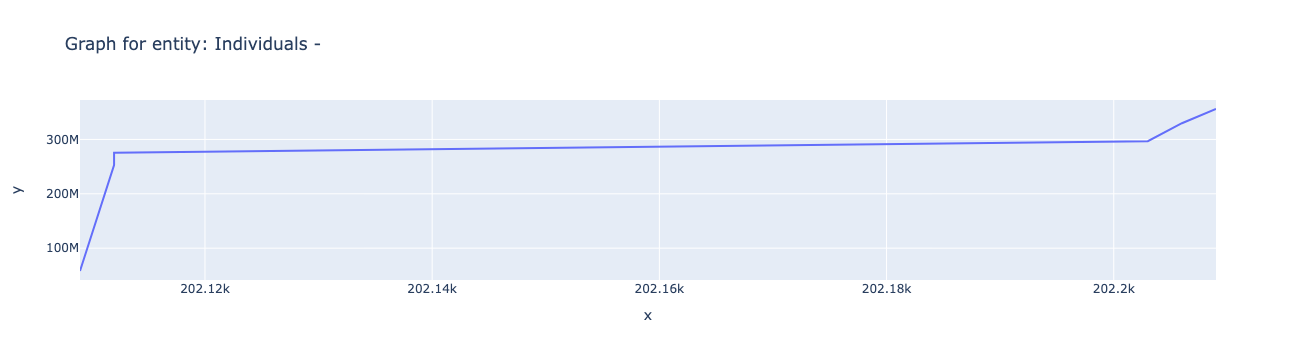

In [22]:
print(eois)
dates_in_x = []
for date in dates:
    dd, mm, yy = date.split("-")
    dates_in_x.append((2000 + int(yy))*100 + int(mm))
print(dates)
from collections import OrderedDict
for entity in eois:
    #print(entity)
    date_sharholding_per_map_for_entity = OrderedDict()
    for date in dates:
        date_sharholding_per_map_for_entity[date] = date_entity_shareholding_per_map[date].get(entity, 0)
    #print(date_sharholding_per_map)
    
    fig = px.line(x=dates_in_x, y=date_sharholding_per_map_for_entity.values(), title = f"Graph for entity: {entity}") 
    fig.show()

In [ ]:
date = dates[-2]
file_name = date.join(file_name_syntax)
df_for_eoi = pd.read_csv(file_name,index_col=0, header=0)
entities = df_for_eoi.loc[:, "CATEGORY OF SHAREHOLDER"]
df = pd.read_csv(file_name,index_col=1, header=0)

In [ ]:
df.loc[:,'TOTAL NOS. SHARES HELD']

In [1]:
import plotly as px